In [1]:
from datainit import *
from helpers import *

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

In [2]:
# Models init
knn = pickle.load(open('../database/modele/KNN.pkl', 'rb'))
xgb = pickle.load(open('../database/modele/XGBmodel.pkl', 'rb'))
random_forest = pickle.load(open('../database/modele/RandomForest.pkl', 'rb'))

/home/kodascii/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kodascii/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
df = pd.DataFrame(data=[], columns=['model', 'accuracy', 'recall', 'precision', 'f1_score', 'AUC'])
#df.loc[len(df)] = calc_metrics('knn', knn)
df.loc[len(df)] = calc_metrics('xgboost', xgb)
df.loc[len(df)] = calc_metrics('random_forest', random_forest)
df

,model,accuracy,recall,precision,f1_score,AUC
0,xgboost,0.999866,0.995575,0.987461,0.991501,0.999972
1,random_forest,0.999762,0.969659,1.000000,0.984596,0.999884


In [4]:
df_long = df.melt(id_vars='model', var_name='metric', value_name='value')
df_long

,model,metric,value
0,xgboost,accuracy,0.999866
1,random_forest,accuracy,0.999762
2,xgboost,recall,0.995575
3,random_forest,recall,0.969659
4,xgboost,precision,0.987461
5,random_forest,precision,1.000000
6,xgboost,f1_score,0.991501
7,random_forest,f1_score,0.984596
8,xgboost,AUC,0.999972
9,random_forest,AUC,0.999884


<Axes: xlabel='metric', ylabel='value'>

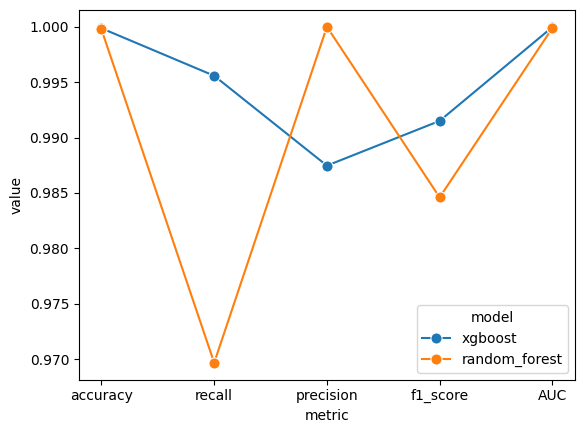

In [5]:
sns.lineplot(data=df_long, x='metric', y='value', hue='model', marker='o', markersize=8)